# Applied Data Science Capstone Project - The Battle of Neighborhoods¶


## Introduction/Business Problem


I have been living in Virginia Beach for 4 years, a lovely and peaceful place. When i first came here then, there 
was not much factors i cared about while selecting the best neighborhood for my family. Actually i even was not aware of the information out there which might help on my decision process. I wish i would have much more info to work on and made a better decision. 

One of my friends decided to move here in Virginia Beach and asked for help to find the best place to live depending on his priorities. What attributes should we consider further to make the final conclusion? We discussed on this problem and figured out that we should focus on 
- housing availability, 
- house price, 
- median income level, 
- nearby facilities, and in sum rating scores.





***

## A description of the data

VA Beach is divided into __10 area__ based on the zipcodes. We can find each region by __zillow.com__ 
We will apply __'uszipcode'__ package to get the coordinates, total housing units, occupied housing units, median home value, and median household income information and explore these areas by __Foursquare API.__ It would  would help us to get valuable information like __most common venues__ for each area.

After  data preprocessing phase, we will utilize __K-means algorithm__ to group the areas into 5 clusters to explore the similarities among them. Finally we will scrape ranking data from __areavibes.com__ for Virginia Beach to finalzie our search.

So we will use forsources to get necessarry data. They are:
* __[Zip Codes in Virginia Beach City VA by Zillow.com](https://www.zillow.com/browse/homes/va/virginia-beach-city/)__
* `Neighborhood demographic information data`: __uszipcode package__
* `Most popular venues data`: __[Foursquare API](https://foursquare.com/)__
* `City livability ranking data`: https://www.areavibes.com/


### Importing Libraries

In [159]:
import numpy as np # library to handle data in a vectorized manner
import geopy
import pandas as pd # library for data analsysis
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [182]:
!pip install uszipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [240]:
# zipcode source (https://www.zillow.com/browse/homes/va/virginia-beach-city/)
d = {'Zipcode':[23451,23452,23453,23454,23455,23456,23457,23462,23464],\
     'Neighborhood':['Ocean Front','Little Neck','Ships Corner','Great Neck&Dam Neck Corner','Throughgood',\
                     'Pungo','Munden','Pembroke','Kempsville'],\
     'Area':['East VAB','North VAB','South VAB','SouthEast VAB','NorthWest VAB','SouthEast VAB','South VAB',\
             'Downtown','SouthWest VAB']}
df = pd.DataFrame(data = d)
df

,Zipcode,Neighborhood,Area
0,23451,Ocean Front,East VAB
1,23452,Little Neck,North VAB
2,23453,Ships Corner,South VAB
3,23454,Great Neck&Dam Neck Corner,SouthEast VAB
4,23455,Throughgood,NorthWest VAB
5,23456,Pungo,SouthEast VAB
6,23457,Munden,South VAB
7,23462,Pembroke,Downtown
8,23464,Kempsville,SouthWest VAB


### Creating table with realted factors

In [241]:
df['Latitude'] =" "
df['Longitude'] = " "
df['Housing_units']=" "
df['Occupied_housing_units']=" "
df['Median_home_value']=" "
df['Median_household_income']=" "
df.head()

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income
0,23451,Ocean Front,East VAB,,,,,,
1,23452,Little Neck,North VAB,,,,,,
2,23453,Ships Corner,South VAB,,,,,,
3,23454,Great Neck&Dam Neck Corner,SouthEast VAB,,,,,,
4,23455,Throughgood,NorthWest VAB,,,,,,


 Credit goes yo __PyPi__ uszipcode package


In [317]:
for i in range(0,len(df)):
    zipcode = search.by_zipcode(df['Zipcode'][i])
    df['Latitude'][i] = zipcode.lat
    df['Longitude'][i] = zipcode.lng
    df['Housing_units'][i] = zipcode.housing_units
    df['Occupied_housing_units'][i] = zipcode.occupied_housing_units
    df['Median_home_value'][i]=zipcode.median_home_value
    df['Median_household_income'][i]=zipcode.median_household_income
  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages

In [318]:
VAB_data = df.copy()
VAB_data

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster
0,23451,Ocean Front,East VAB,36.86,-76.03,23513,19576,435600,59017,0.0
1,23452,Little Neck,North VAB,36.85,-76.1,23662,22599,239100,61522,2.0
2,23453,Ships Corner,South VAB,36.78,-76.08,12701,12048,234600,66944,3.0
3,23454,Great Neck&Dam Neck Corner,SouthEast VAB,36.8,-76,24246,23044,289400,64721,2.0
4,23455,Throughgood,NorthWest VAB,36.91,-76.14,20439,19072,276900,62949,1.0
5,23456,Pungo,SouthEast VAB,36.7,-76,18247,16574,327500,92574,0.0
6,23457,Munden,South VAB,36.6,-76,1656,1565,365800,85037,2.0
7,23462,Pembroke,Downtown,36.84,-76.15,26087,24396,210900,56617,NaN
8,23464,Kempsville,SouthWest VAB,36.8,-76.18,27058,25956,257100,71192,NaN


In [319]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

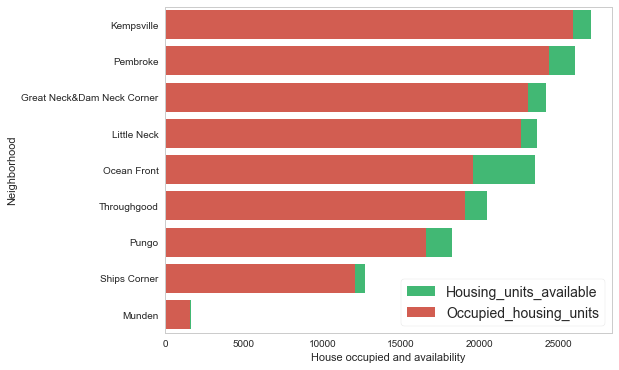

In [245]:
f, ax = plt.subplots(figsize=(8,6))

neighbor = VAB_data.sort_values(["Housing_units"], ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x=neighbor["Housing_units"],y=neighbor["Neighborhood"],data=neighbor,label="Housing_units_available",color="#2ecc71")

sns.set_color_codes("muted")
sns.barplot(x=neighbor["Occupied_housing_units"],y=neighbor["Neighborhood"],data=neighbor,label="Occupied_housing_units",color="#e74c3c")

ax.legend(loc="lower right",frameon=True,fontsize=14)
ax.set(ylabel="Neighborhood",xlabel="House occupied and availability")
ax.grid(False)

* This figure shows us which regions are much popular to live if we noticed availability of the houses. Little Nec and Great Neck areas are in high demand

In [246]:
neighbor

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income
8,23464,Kempsville,SouthWest VAB,36.8,-76.18,27058,25956,257100,71192
7,23462,Pembroke,Downtown,36.84,-76.15,26087,24396,210900,56617
3,23454,Great Neck&Dam Neck Corner,SouthEast VAB,36.8,-76,24246,23044,289400,64721
1,23452,Little Neck,North VAB,36.85,-76.1,23662,22599,239100,61522
0,23451,Ocean Front,East VAB,36.86,-76.03,23513,19576,435600,59017
4,23455,Throughgood,NorthWest VAB,36.91,-76.14,20439,19072,276900,62949
5,23456,Pungo,SouthEast VAB,36.7,-76,18247,16574,327500,92574
2,23453,Ships Corner,South VAB,36.78,-76.08,12701,12048,234600,66944
6,23457,Munden,South VAB,36.6,-76,1656,1565,365800,85037


### We should handle with the NaN values

In [247]:
neighbor['Median_home_value'].fillna(neighbor['Median_home_value'].mean(),inplace=True)
neighbor['Median_household_income'].fillna(neighbor['Median_household_income'].mean(),inplace=True)

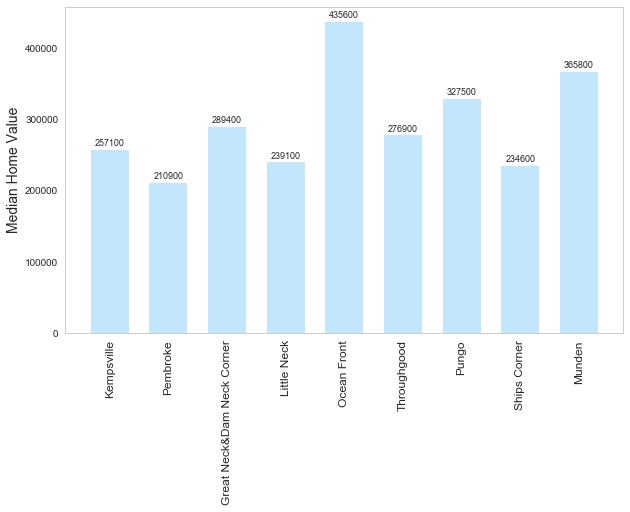

In [248]:
plt.figure(figsize=(10,6))
plt.bar(neighbor["Neighborhood"], neighbor["Median_home_value"],width=0.65,facecolor='lightskyblue',alpha=0.5)
plt.ylabel("Median Home Value",fontsize=14)
plt.xticks(rotation="vertical",fontsize=12)
plt.grid(False)

for a,b in zip(neighbor["Neighborhood"],neighbor["Median_home_value"]):

    plt.text(a, 1.01*b, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)

When we check the median house price, the Ocean Front is the most expensive area, and the price is highly different among others neighborhood, for example, the median price in Pembroke is only \$210,900. The median house price in Little Neck is \$239,100 which is lower than the \$289,400 median price at Great Neck. The price shows another support for Little Neck.

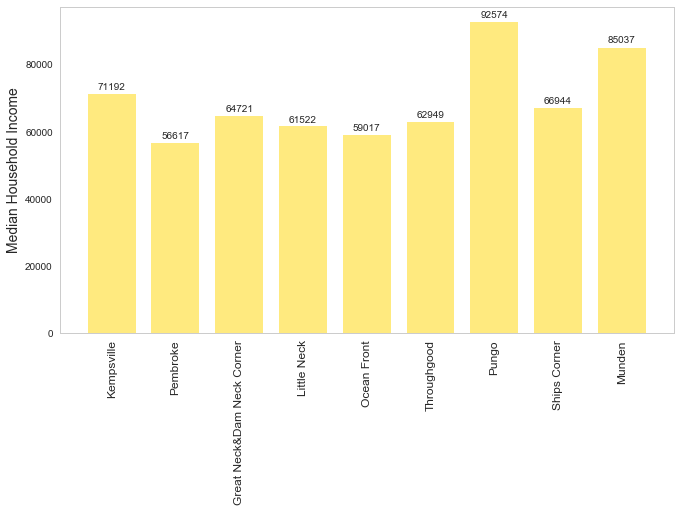

In [249]:
plt.figure(figsize=(11,6))
plt.bar(neighbor["Neighborhood"], neighbor["Median_household_income"],width=0.75,facecolor='gold',align='center',alpha=0.5)
plt.ylabel("Median Household Income",fontsize=14)
plt.xticks(rotation="vertical",fontsize=12)
plt.grid(False)

for a,b in zip(neighbor["Neighborhood"],neighbor["Median_household_income"]):

    plt.text(a, 1.01*b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

The household median income in Pungo area is the highest and the income level for Little Neck and Great Neck are close to each other.


### Let`s get the coordinates of VAB

In [250]:
# import geocoder
address = 'Virginia Beach,VA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of VA Beach are {}, {}.'.format(latitude, longitude))

/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of VA Beach are 36.8529841, -75.9774183.


In [251]:
# create map of Chicago using latitude and longitude values
map_dt_VAB = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dt_VAB)  
    
map_dt_VAB

### Let`s get help from FourSquare

In [252]:
CLIENT_ID = 'VOSXZ2DAW24EIZHS42UWJTZKFM43KPBUIIFHPGBBSGJYB5IK' # your Foursquare ID
CLIENT_SECRET = 'APLG3CIBEXPJRBFYVFBGMODGO43NL4AJR25XLELCT1D5YG10' # your Foursquare Secret
VERSION = '20181003' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VOSXZ2DAW24EIZHS42UWJTZKFM43KPBUIIFHPGBBSGJYB5IK
CLIENT_SECRET:APLG3CIBEXPJRBFYVFBGMODGO43NL4AJR25XLELCT1D5YG10


Take the first region in our table as an example

In [253]:
df.loc[0, 'Neighborhood']

'Ocean Front'

In [254]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ocean Front are 36.86, -76.03.


### Top 100 venues that are in Ocean Frontl within a radius of 500 meters.

In [255]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=VOSXZ2DAW24EIZHS42UWJTZKFM43KPBUIIFHPGBBSGJYB5IK&client_secret=APLG3CIBEXPJRBFYVFBGMODGO43NL4AJR25XLELCT1D5YG10&v=20181003&ll=36.86,-76.03&radius=500&limit=100'

In [256]:
results = requests.get(url).json()

In [257]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let`s clean the json and structure it into a pandas dataframe.

In [258]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,ALDI,Grocery Store,36.856739,-76.026602
1,Stoney's Produce,Flower Shop,36.863982,-76.028925
2,7-Eleven,Convenience Store,36.859215,-76.029294
3,Plastic Surgery of Virginia Beach,Medical Center,36.862829,-76.029913
4,Breedlove Eye Center,Optical Shop,36.861368,-76.026152


In [259]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


## Let`s Explore Neighborhoods in Virginia Beach

In [260]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Let`s create a new dataframe called VAB_venues.


In [261]:
VAB_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ocean Front
Little Neck
Ships Corner
Great Neck&Dam Neck Corner
Throughgood
Pungo
Munden
Pembroke
Kempsville


In [262]:
print(VAB_venues.shape)
VAB_venues.head()

(75, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ocean Front,36.86,-76.03,ALDI,36.856739,-76.026602,Grocery Store
1,Ocean Front,36.86,-76.03,Stoney's Produce,36.863982,-76.028925,Flower Shop
2,Ocean Front,36.86,-76.03,7-Eleven,36.859215,-76.029294,Convenience Store
3,Ocean Front,36.86,-76.03,Plastic Surgery of Virginia Beach,36.862829,-76.029913,Medical Center
4,Ocean Front,36.86,-76.03,Breedlove Eye Center,36.861368,-76.026152,Optical Shop


### How many unique categories can be curated from all the returned venues


In [263]:
print('There are {} uniques categories.'.format(len(VAB_venues['Venue Category'].unique())))

There are 55 uniques categories.


## Analyzing Each Neighborhood¶


In [264]:
# one hot encoding
VAB_onehot = pd.get_dummies(VAB_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
VAB_onehot['Neighborhood'] = VAB_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [VAB_onehot.columns[-1]] + list(VAB_onehot.columns[:-1])
VAB_onehot = VAB_onehot[fixed_columns]

VAB_onehot.head()

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Auto Garage,Bakery,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,...,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Steakhouse,Supermarket,Video Store,Yoga Studio
0,Ocean Front,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ocean Front,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ocean Front,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ocean Front,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ocean Front,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
VAB_onehot.shape

(75, 56)

### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [266]:
VAB_grouped = VAB_onehot.groupby('Neighborhood').mean().reset_index()
VAB_grouped

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Auto Garage,Bakery,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,...,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Steakhouse,Supermarket,Video Store,Yoga Studio
0,Great Neck&Dam Neck Corner,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000
1,Kempsville,0.027778,0.000000,0.027778,0.055556,0.027778,0.000000,0.027778,0.027778,0.027778,...,0.00,0.083333,0.027778,0.027778,0.027778,0.027778,0.027778,0.000000,0.000000,0.027778
2,Little Neck,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ocean Front,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Pembroke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Ships Corner,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,Throughgood,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,...,0.00,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [267]:
VAB_grouped.shape

(7, 56)

### Top 5 most common venues for each neighborhood¶


In [268]:
num_top_venues = 5

for hood in VAB_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = VAB_grouped[VAB_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Great Neck&Dam Neck Corner----
               venue  freq
0        Video Store  0.14
1        Supermarket  0.14
2     Lingerie Store  0.14
3  Martial Arts Dojo  0.14
4  Convenience Store  0.14


----Kempsville----
                  venue  freq
0  Fast Food Restaurant  0.08
1        Sandwich Place  0.08
2             Pet Store  0.06
3                Bakery  0.06
4   Arts & Crafts Store  0.03


----Little Neck----
           venue  freq
0  Moving Target  0.17
1    Music Store  0.17
2    Music Venue  0.17
3          River  0.17
4     Playground  0.17


----Ocean Front----
               venue  freq
0     Medical Center  0.17
1       Optical Shop  0.17
2  Convenience Store  0.17
3      Grocery Store  0.17
4               Park  0.17


----Pembroke----
                 venue  freq
0    Convenience Store  0.50
1       Ice Cream Shop  0.25
2   Rock Climbing Spot  0.25
3  Arts & Crafts Store  0.00
4             Pharmacy  0.00


----Ships Corner----
                        venue  freq
0     

#### Convert this to a  pandas dataframe¶


In [269]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [270]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = VAB_grouped['Neighborhood']

for ind in np.arange(VAB_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(VAB_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Great Neck&Dam Neck Corner,Supermarket,Video Store,Gym,Gun Shop,Lingerie Store,Martial Arts Dojo,Convenience Store,Yoga Studio,Eye Doctor,Gym / Fitness Center
1,Kempsville,Fast Food Restaurant,Sandwich Place,Bakery,Pet Store,Yoga Studio,Italian Restaurant,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center
2,Little Neck,Park,River,Playground,Moving Target,Music Store,Music Venue,Department Store,Gym,Gun Shop,Grocery Store
3,Ocean Front,Park,Grocery Store,Medical Center,Flower Shop,Convenience Store,Optical Shop,Yoga Studio,Hobby Shop,Gym / Fitness Center,Gym
4,Pembroke,Convenience Store,Rock Climbing Spot,Ice Cream Shop,Yoga Studio,Eye Doctor,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Gun Shop
5,Ships Corner,Intersection,Construction & Landscaping,Convenience Store,Video Store,Bakery,Breakfast Spot,Hotel,Hot Dog Joint,Hobby Shop,Gym / Fitness Center
6,Throughgood,Hotel,Sandwich Place,Asian Restaurant,Department Store,Food Court,Burger Joint,Pizza Place,Fast Food Restaurant,Grocery Store,Coffee Shop


#  Cluster Neighborhoods¶


## Run k-means to cluster the neighborhood into 4 clusters.


In [284]:
# set number of clusters
kclusters = 4

VAB_grouped_clustering = VAB_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(VAB_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 3, 2, 1, 0, 2], dtype=int32)

In [285]:
kmeans.labels_.shape

(7,)

In [286]:
VAB_grouped_clustering.head(10)


,Arts & Crafts Store,Asian Restaurant,Auto Garage,Bakery,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Construction & Landscaping,...,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Steakhouse,Supermarket,Video Store,Yoga Studio
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000
1,0.027778,0.000000,0.027778,0.055556,0.027778,0.000000,0.027778,0.027778,0.027778,0.00,...,0.00,0.083333,0.027778,0.027778,0.027778,0.027778,0.027778,0.000000,0.000000,0.027778
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.00,...,0.00,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [287]:
k = pd.Series(kmeans.labels_)
k.astype(int)

0    0
1    2
2    3
3    2
4    1
5    0
6    2
dtype: int64

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [288]:
VAB_merged = df
VAB_merged

# add clustering labels
VAB_merged['Cluster'] = k

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
VAB_merged = VAB_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


VAB_merged # check the last columns!

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,23451,Ocean Front,East VAB,36.86,-76.03,23513,19576,435600,59017,0.0,Park,Grocery Store,Medical Center,Flower Shop,Convenience Store,Optical Shop,Yoga Studio,Hobby Shop,Gym / Fitness Center,Gym
1,23452,Little Neck,North VAB,36.85,-76.1,23662,22599,239100,61522,2.0,Park,River,Playground,Moving Target,Music Store,Music Venue,Department Store,Gym,Gun Shop,Grocery Store
2,23453,Ships Corner,South VAB,36.78,-76.08,12701,12048,234600,66944,3.0,Intersection,Construction & Landscaping,Convenience Store,Video Store,Bakery,Breakfast Spot,Hotel,Hot Dog Joint,Hobby Shop,Gym / Fitness Center
3,23454,Great Neck&Dam Neck Corner,SouthEast VAB,36.8,-76,24246,23044,289400,64721,2.0,Supermarket,Video Store,Gym,Gun Shop,Lingerie Store,Martial Arts Dojo,Convenience Store,Yoga Studio,Eye Doctor,Gym / Fitness Center
4,23455,Throughgood,NorthWest VAB,36.91,-76.14,20439,19072,276900,62949,1.0,Hotel,Sandwich Place,Asian Restaurant,Department Store,Food Court,Burger Joint,Pizza Place,Fast Food Restaurant,Grocery Store,Coffee Shop
5,23456,Pungo,SouthEast VAB,36.7,-76,18247,16574,327500,92574,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23457,Munden,South VAB,36.6,-76,1656,1565,365800,85037,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23462,Pembroke,Downtown,36.84,-76.15,26087,24396,210900,56617,NaN,Convenience Store,Rock Climbing Spot,Ice Cream Shop,Yoga Studio,Eye Doctor,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Gun Shop
8,23464,Kempsville,SouthWest VAB,36.8,-76.18,27058,25956,257100,71192,NaN,Fast Food Restaurant,Sandwich Place,Bakery,Pet Store,Yoga Studio,Italian Restaurant,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center


### Finally, let's visualize the resulting clusters


In [276]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(VAB_merged['Latitude'], VAB_merged['Longitude'], VAB_merged['Neighborhood'], VAB_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

### Cluster 1

In [289]:
VAB_merged.loc[VAB_merged['Cluster'] == 0, VAB_merged.columns[[1] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ocean Front,23513,19576,435600,59017,0.0,Park,Grocery Store,Medical Center,Flower Shop,Convenience Store,Optical Shop,Yoga Studio,Hobby Shop,Gym / Fitness Center,Gym
5,Pungo,18247,16574,327500,92574,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cluster 2

In [290]:
VAB_merged.loc[VAB_merged['Cluster'] == 1, VAB_merged.columns[[1] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Throughgood,20439,19072,276900,62949,1.0,Hotel,Sandwich Place,Asian Restaurant,Department Store,Food Court,Burger Joint,Pizza Place,Fast Food Restaurant,Grocery Store,Coffee Shop


### Cluster 3

In [291]:
VAB_merged.loc[VAB_merged['Cluster'] == 2, VAB_merged.columns[[1] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Little Neck,23662,22599,239100,61522,2.0,Park,River,Playground,Moving Target,Music Store,Music Venue,Department Store,Gym,Gun Shop,Grocery Store
3,Great Neck&Dam Neck Corner,24246,23044,289400,64721,2.0,Supermarket,Video Store,Gym,Gun Shop,Lingerie Store,Martial Arts Dojo,Convenience Store,Yoga Studio,Eye Doctor,Gym / Fitness Center
6,Munden,1656,1565,365800,85037,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cluster 4

In [292]:
VAB_merged.loc[VAB_merged['Cluster'] == 3, VAB_merged.columns[[1] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ships Corner,12701,12048,234600,66944,3.0,Intersection,Construction & Landscaping,Convenience Store,Video Store,Bakery,Breakfast Spot,Hotel,Hot Dog Joint,Hobby Shop,Gym / Fitness Center


##### From the cluster results, we noticed that Little Neck and Great Neck have been groupped into a same cluster, which basically says that based on the most common nearby facilities, those two region are similiar.

# The Battle of Neighborhoods

## Little Neck, Great Neck or Munden?

In [297]:
from bs4 import BeautifulSoup
import requests

In [298]:
import time
from time import sleep

In [395]:
records=[]
for neighborhood in ['virginia beach','chesapeake','norfolk']:
    Neighborhood=neighborhood.title()
    r=requests.get("https://www.areavibes.com/{}-va/livability/".format(neighborhood))
    soup = BeautifulSoup(r.text,'html.parser')
    result=soup.find_all('div', class_='map')
    Latitude=result[0]['data-lat']
    Longitude=result[0]['data-lon']
    result1=soup.find_all('div', class_='score-map')
    Livability=result1[0].text[1:-1]
    result2=soup.find_all('a',class_='box')
    Amenities=result2[0].find('span').text[9:]
    Cost_of_Living=result2[1].find('span').text[14:]
    Crime=result2[2].find('span').text[5:]
    Education=result2[3].find('span').text[9:]
    Employment=result2[4].find('span').text[10:]
    Housing=result2[5].find('span').text[7:]
    Weather=result2[6].find('span').text[7:]
    records.append((Neighborhood,Latitude,Longitude,Livability,Amenities,Cost_of_Living,Crime,Education,Housing,Weather))
    time.sleep(5)

In [396]:
bon=pd.DataFrame(records,columns=['Neighborhood','Latitude','Longitude','Livability','Amenities','Cost_of_Living','Crime','Education','Housing','Weather'])

In [397]:
bon=bon.sort_values(['Livability'], ascending=False).reset_index(drop=True)
bon

,Neighborhood,Latitude,Longitude,Livability,Amenities,Cost_of_Living,Crime,Education,Housing,Weather
0,Virginia Beach,36.85292,-75.97798,77,A+,F,B+,A+,F,C+
1,Chesapeake,36.76821,-76.28749,69,B+,F,D+,A+,F,C+
2,Norfolk,36.85077,-76.28587,68,A+,D,F,A,F,B-


#### According to the data scraped from the areavibes.com, Virginia Beach scored the highest among the three cities and got 77/100 Livavility scores. The score is based on the quantify of different measurement variables such as Amenities, Cost of Living, Crime, Housing, and Education, etc.

## Conclusion

#### Virginia Beach is the best choice for people to live, not only because the relative low median house price, but also the downtown-like nearby popular facilities and stores. And our conclusion is align with areavibe's livability rankings.